<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:brown;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
    CODE-CLASUE
Customer Segmentation
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Task 3 Objective:-Customer Segmentation.<br>

<b>Description</b><br>

💡 The dataset was originally given for a competition where they had to make a model to PREDICT the customers segments with a Train.csv and a Test.csv files, but since we want to detect the categories by ourselves, we will not use the "Segmentation" column !.<br>.
💡 .<br>
💡 .<br>
💡 Dataset Link:- https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv<br>
 
<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color:aliceblue;"><b> Author:- </b> Rahul Kumar</h2>
</div> 

# Import Libraries

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.preprocessing  import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [261]:
test_df = pd.read_csv("C:/Users/user/Downloads/Test (1).csv")
train_df = pd.read_csv("C:/Users/user/Downloads/Train (1).csv")

In [262]:
df = pd.concat([train_df, test_df])

In [263]:
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Basic Understanding of Data 
</p>
</div>

In [264]:
# dropping the rows having NaN values
df = df.dropna()

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8819 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8819 non-null   int64  
 1   Gender           8819 non-null   object 
 2   Ever_Married     8819 non-null   object 
 3   Age              8819 non-null   int64  
 4   Graduated        8819 non-null   object 
 5   Profession       8819 non-null   object 
 6   Work_Experience  8819 non-null   float64
 7   Spending_Score   8819 non-null   object 
 8   Family_Size      8819 non-null   float64
 9   Var_1            8819 non-null   object 
 10  Segmentation     8819 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 826.8+ KB


In [266]:
df1 = (df.isnull().sum()[df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df1["% of Missing Values"] = round((100*df.isnull().sum()[df.isnull().sum()>0]/len(df)),2)
df1

,Number of Missing values,% of Missing Values


In [267]:
df["Ever_Married"]=df["Ever_Married"].fillna(df["Ever_Married"].mode())
df["Graduated"]=df["Graduated"].fillna(df["Graduated"].mode()[0])
df["Profession"]=df["Profession"].fillna(df["Profession"].mode()[0])
df["Work_Experience"]=df["Work_Experience"].fillna(df["Work_Experience"].median())
df["Family_Size"]=df["Family_Size"].fillna(df["Family_Size"].median())
df["Var_1"]=df["Var_1"].fillna(df["Var_1"].mode())

In [268]:
df1 = (df.isnull().sum()[df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df1["% of Missing Values"] = round((100*df.isnull().sum()[df.isnull().sum()>0]/len(df)),2)
df1

,Number of Missing values,% of Missing Values


### Check duplicates values 

In [269]:
print(f"% of of duplicates value:({df.duplicated().sum()})({100*df.duplicated().sum()/len(df)})%")

% of of duplicates value:(26)(0.29481800657670937)%


In [270]:
df= df.drop_duplicates()

In [271]:
print(f"% of of duplicates value:({df.duplicated().sum()})({100*df.duplicated().sum()/len(df)})%")

% of of duplicates value:(0)(0.0)%


### Showing Categorical Features

In [272]:
df.select_dtypes(include="object").head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
5,Male,Yes,No,Artist,Average,Cat_6,C
6,Male,No,Yes,Healthcare,Low,Cat_6,C


 ### Showing Numerical Features

In [273]:
df.select_dtypes(include=['int','float'])

,ID,Age,Work_Experience,Family_Size
0,462809,22,1.0,4.0
2,466315,67,1.0,1.0
3,461735,67,0.0,2.0
5,461319,56,0.0,2.0
6,460156,32,1.0,3.0
...,...,...,...,...
2621,467950,35,1.0,2.0
2622,467954,29,9.0,4.0
2623,467958,35,1.0,1.0
2625,467961,47,1.0,5.0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Cleaning
</p>
</div>

In [274]:
df['Var_1'].value_counts()

Cat_6    5880
Cat_4    1165
Cat_3     825
Cat_2     477
Cat_7     218
Cat_1     131
Cat_5      97
Name: Var_1, dtype: int64

In [275]:
df["category"] = df['Var_1'].apply(lambda  x : x.split("_")[1])
df["category"]= df["category"].astype("int")
df.drop(columns=['Var_1','ID'],inplace=True)

In [276]:
for i in df.columns:
    print(df[i].unique())

['Male' 'Female']
['No' 'Yes']
[22 67 56 32 33 61 55 26 19 58 41 31 79 49 18 36 35 45 42 83 27 28 47 40
 57 76 25 48 74 59 51 30 63 52 39 38 60 68 86 43 80 37 46 72 69 50 29 71
 78 82 70 23 20 21 53 75 65 89 62 66 73 77 87 84 88 85 81]
['No' 'Yes']
['Healthcare' 'Engineer' 'Lawyer' 'Artist' 'Doctor' 'Homemaker'
 'Entertainment' 'Marketing' 'Executive']
[ 1.  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
['Low' 'High' 'Average']
[4. 1. 2. 3. 5. 6. 8. 7. 9.]
['D' 'B' 'C' 'A']
[4 6 7 3 1 2 5]


In [277]:
df["Age"].describe().T

count    8793.000000
mean       43.527579
std        16.577833
min        18.000000
25%        31.000000
50%        41.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

In [278]:
def age_group(df):
    age_groups= []
    for i in df["Age"]:
        if i<=18:
            age_groups.append("Age_0-18")
        elif (i>18 and i<=30):
            age_groups.append("Age_19-30")
        elif (i>30 and i<=40):
            age_groups.append("Age_31-40")
        elif (i>40 and i<=50):
            age_groups.append("Age_41_50")
        elif (i>50 and i<=60):
            age_groups.append("age_51-60")
        elif (i>=60 and i<=70):
            age_groups.append("age_61-70")
        elif (i>=70  and i<=80):
            age_groups.append("age_71-80")
        elif (i>=80 and i<=90):
            age_groups.append("age_81-90")

        
    df["Age Group"] = age_groups

In [279]:
age_group(df)

In [280]:
df["Age Group"].value_counts()

Age_31-40    2163
Age_19-30    2051
Age_41_50    1871
age_51-60    1113
age_61-70     730
age_71-80     412
age_81-90     316
Age_0-18      137
Name: Age Group, dtype: int64

In [281]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,category,Age Group
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D,4,Age_19-30
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,6,age_61-70
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,6,age_61-70
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C,6,age_51-60
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C,6,Age_31-40


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis (EDA)
</p>
</div>

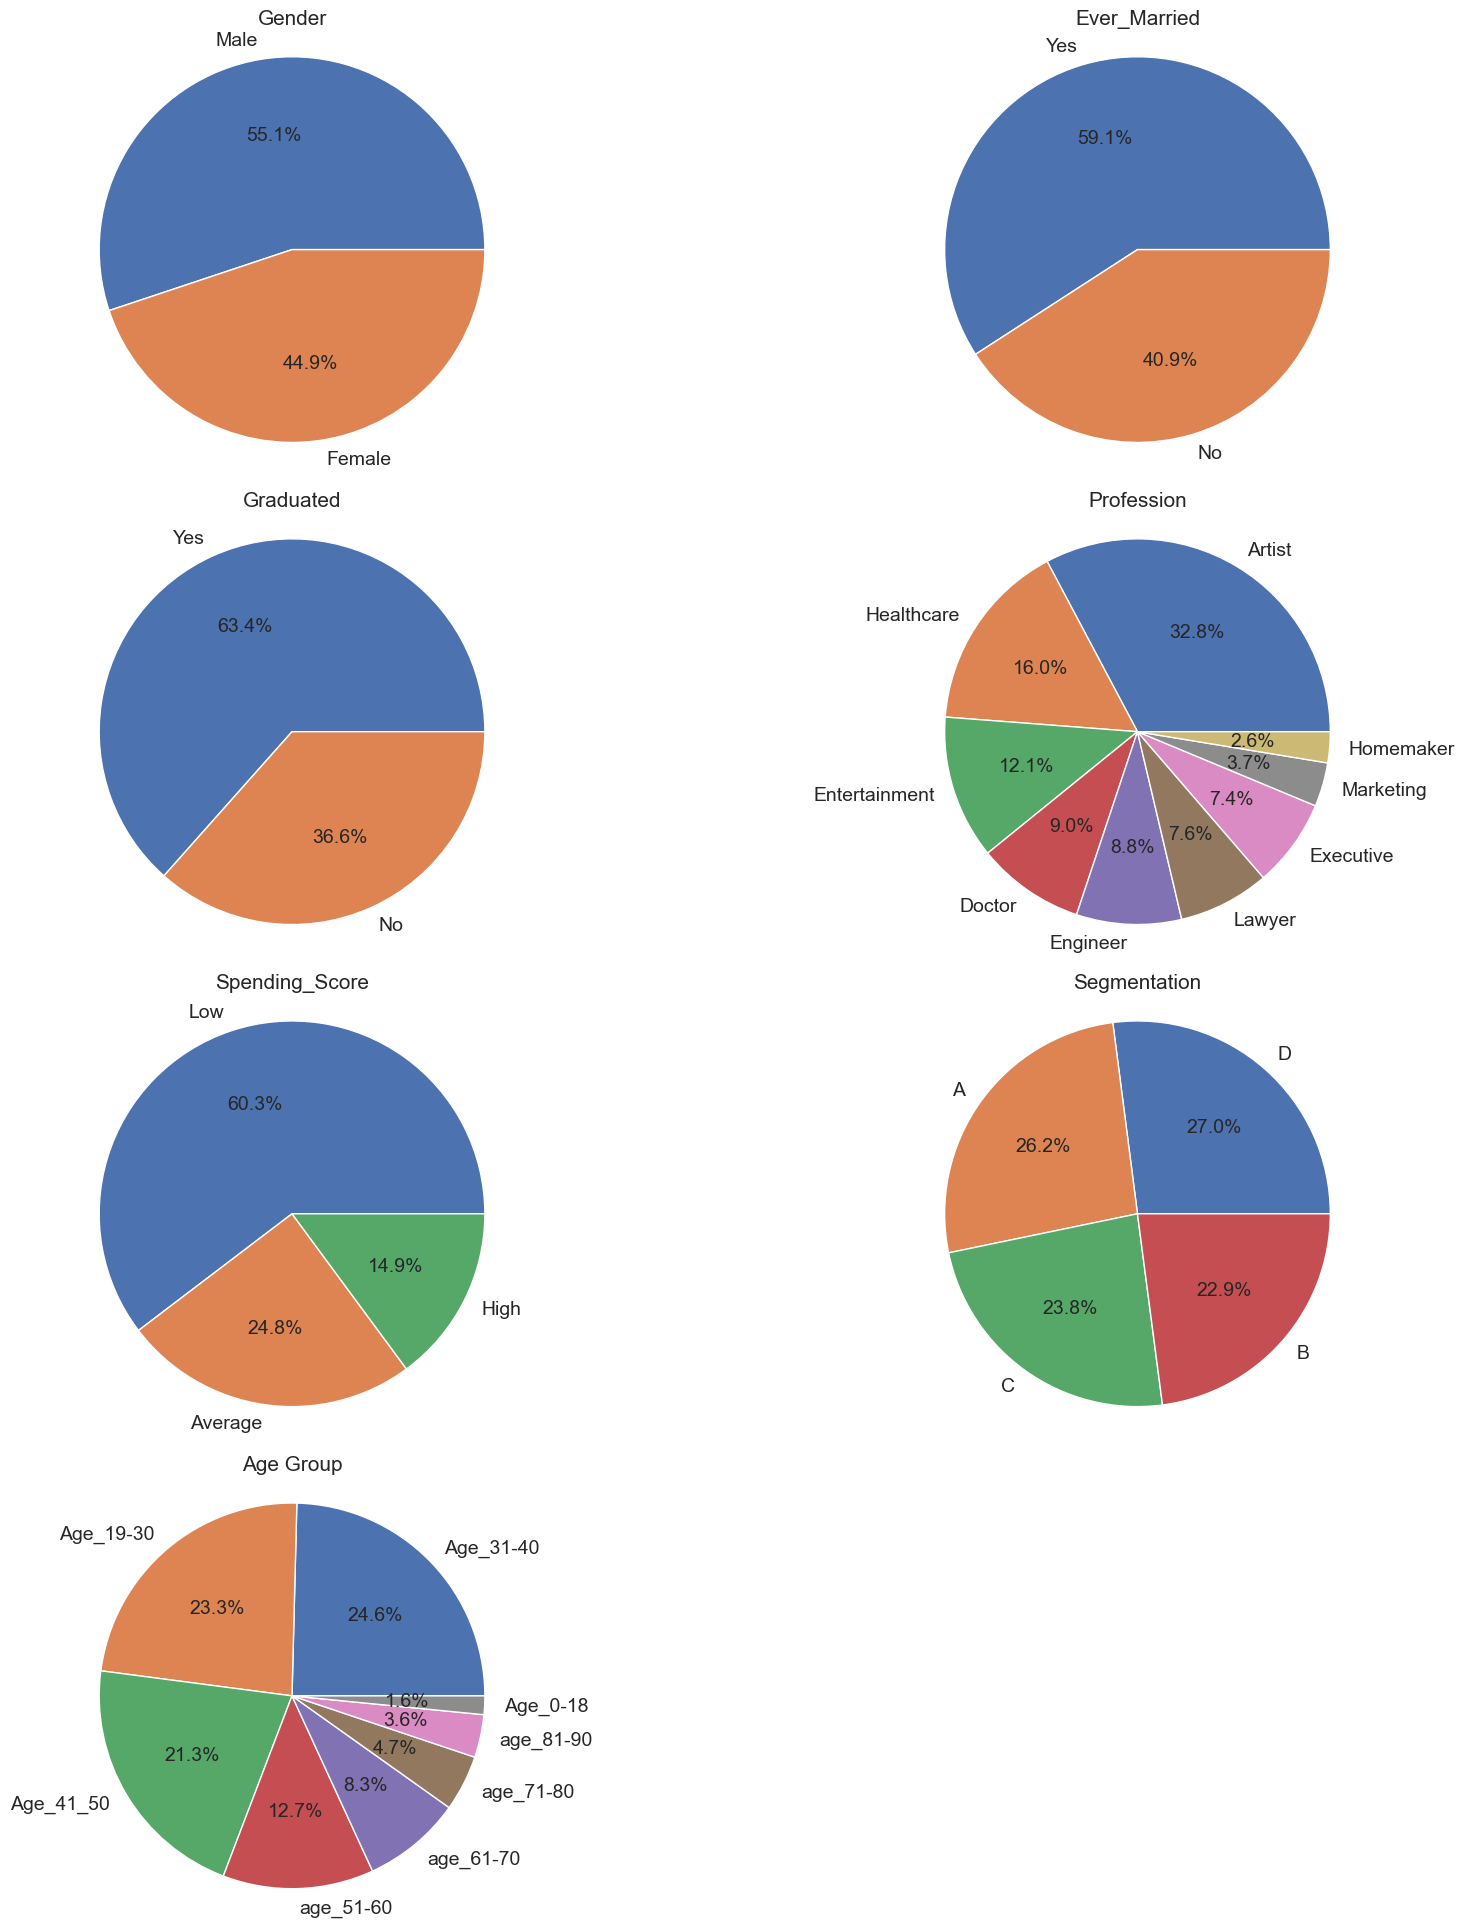

In [282]:
continuous_columns, categorical_columns = [], []
for x in df.columns:
    if df[x].dtypes=='object':
        categorical_columns.append(x)
    else:
        continuous_columns.append(x)


fig, ax = plt.subplots(4,2,figsize=(20,24))
ax = ax.flatten()
fig.delaxes(ax[-1])

for i,x in enumerate(categorical_columns):
    (df[x].value_counts()/df[x].value_counts().sum()).plot.pie(autopct='%1.1f%%', 
                                                                         fontsize=14, ax=ax[i], radius=1.2)
    ax[i].set_title(x, y=1.04, fontsize=15)
    ax[i].set_ylabel("")
    


<AxesSubplot:xlabel='Family_Size', ylabel='Density'>

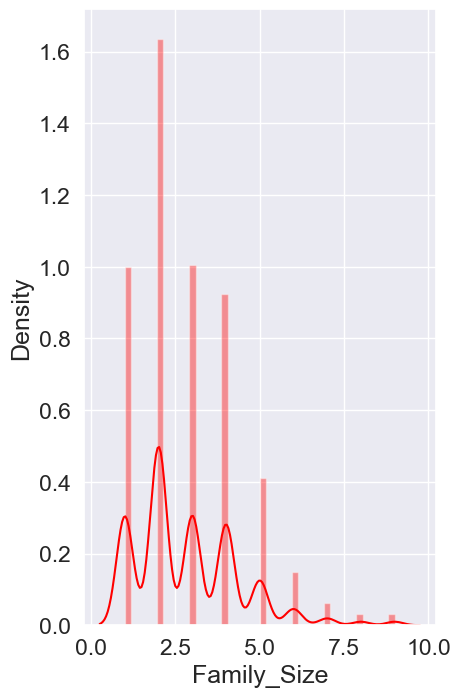

In [283]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(df['Family_Size'],color='red',kde=True)

In [284]:
A = df.groupby(df["Age Group"])["Work_Experience"].agg(["count"])
a = A.sort_values(by="count").reset_index()



In [285]:
a

,Age Group,count
0,Age_0-18,137
1,age_81-90,316
2,age_71-80,412
3,age_61-70,730
4,age_51-60,1113
5,Age_41_50,1871
6,Age_19-30,2051
7,Age_31-40,2163


Text(0.5, 1.0, 'Age Group with Experience')

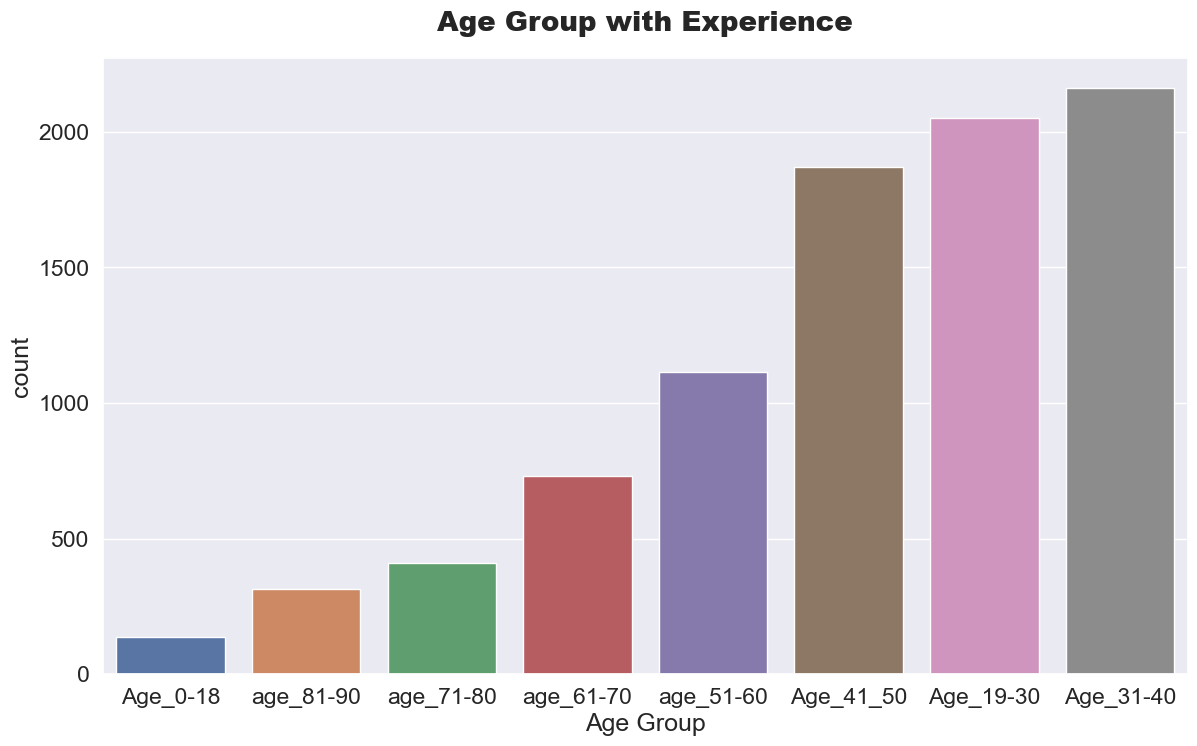

In [286]:
plt.figure(figsize=(14,8))
sns.barplot(a['Age Group'],a['count'])
plt.title("Age Group with Experience",pad=20,fontweight="black",fontsize=20)

In [287]:
R = df.groupby(df['Age Group'])['Ever_Married'].agg('count')
A = R.sort_values(ascending=False).reset_index()

In [288]:
A

,Age Group,Ever_Married
0,Age_31-40,2163
1,Age_19-30,2051
2,Age_41_50,1871
3,age_51-60,1113
4,age_61-70,730
5,age_71-80,412
6,age_81-90,316
7,Age_0-18,137


Text(0.5, 1.0, 'Age Group with Marrige Status')

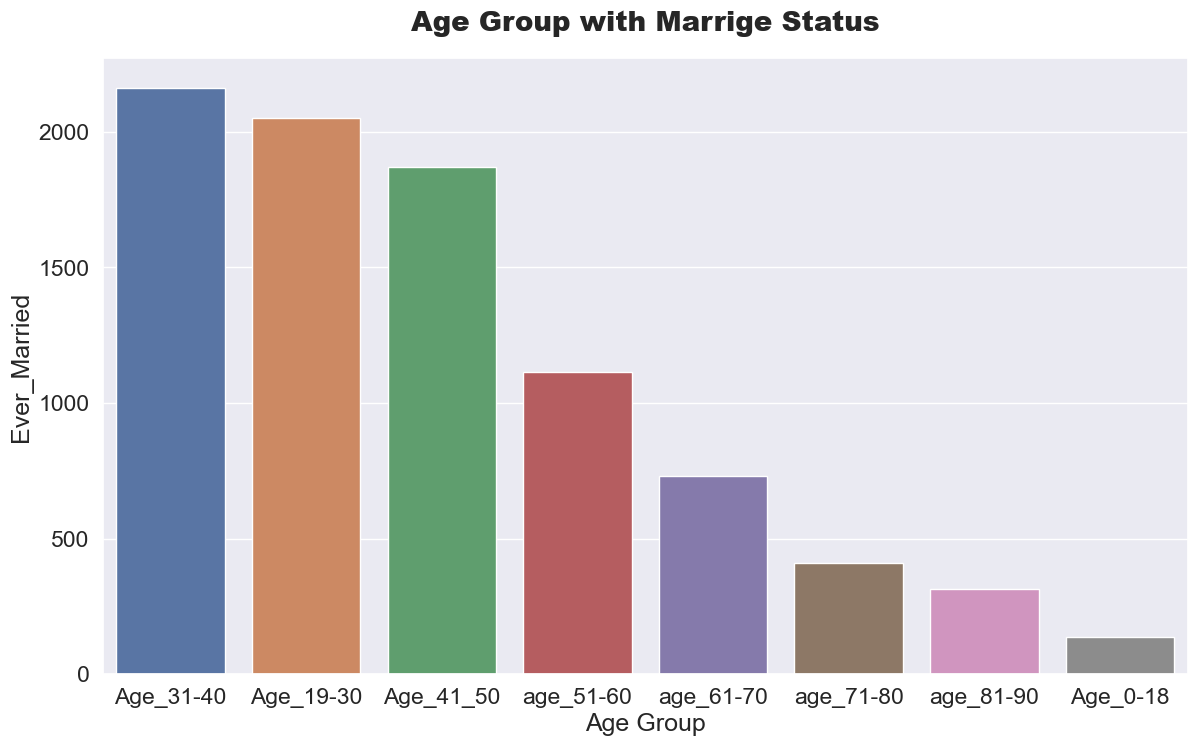

In [289]:
plt.figure(figsize=(14,8))
sns.barplot(A["Age Group"],A["Ever_Married"])
plt.title("Age Group with Marrige Status",pad=20,fontweight="black",fontsize=20)

Text(0.5, 1.0, 'Profession with Experience')

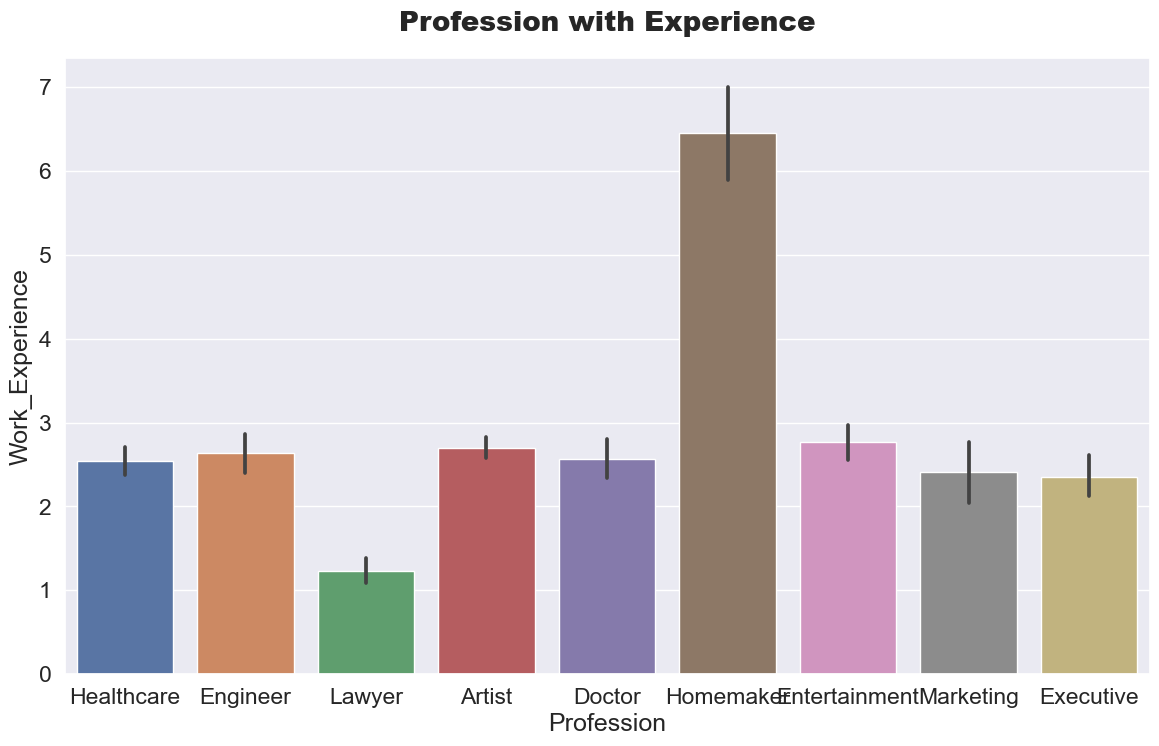

In [290]:
plt.figure(figsize=(14,8))
sns.barplot(df['Profession'],df["Work_Experience"])
plt.title("Profession with Experience",pad=20,fontweight="black",fontsize=20)

In [291]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,category,Age Group
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D,4,Age_19-30
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,6,age_61-70
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,6,age_61-70
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C,6,age_51-60
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C,6,Age_31-40


In [292]:
df["Segmentation"].replace({"A":0,"B":1,"C":2,"D":3},inplace=True)
df.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,category,Age Group
0,Male,No,22,No,Healthcare,1.0,Low,4.0,3,4,Age_19-30
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,1,6,age_61-70
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,1,6,age_61-70


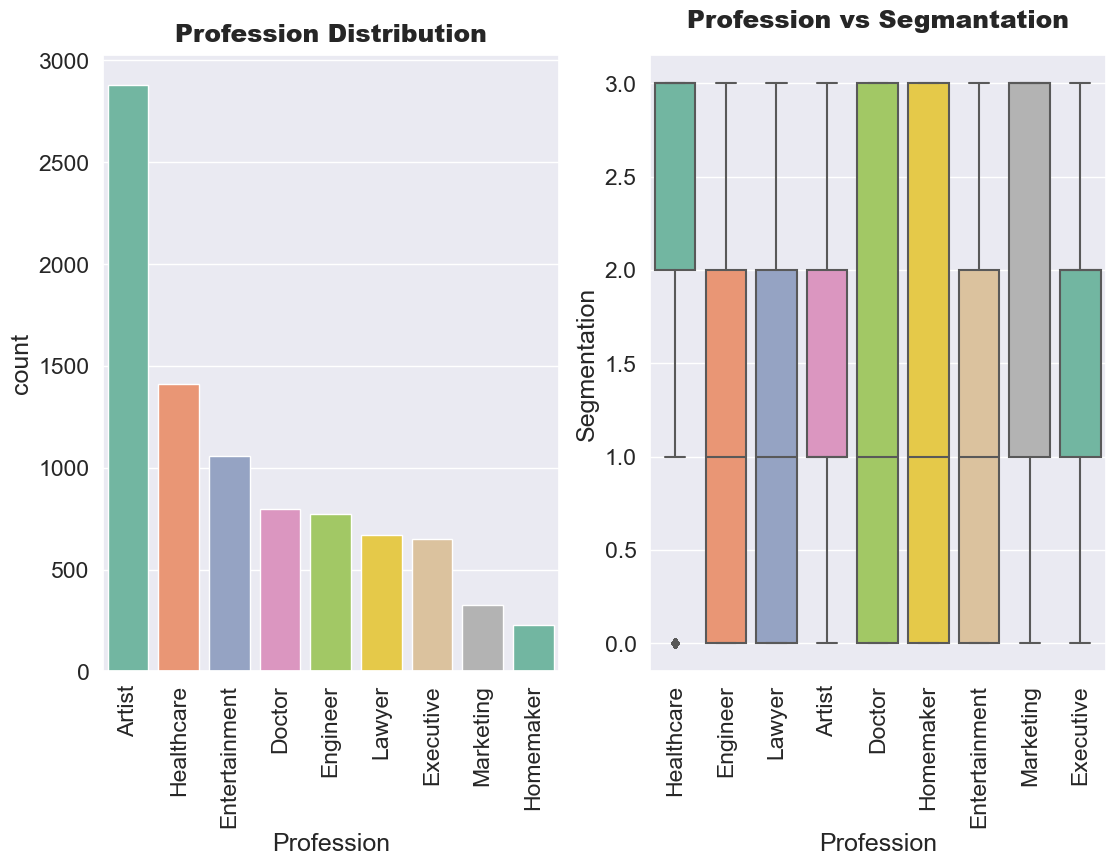

In [293]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(df[cols],palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(df[cols],df["Segmentation"],palette="Set2")
    plt.title(f"{cols} vs Segmantation",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)


categorical_visualization("Profession")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Preprocessing
</p>
</div>

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8793 non-null   object 
 1   Ever_Married     8793 non-null   object 
 2   Age              8793 non-null   int64  
 3   Graduated        8793 non-null   object 
 4   Profession       8793 non-null   object 
 5   Work_Experience  8793 non-null   float64
 6   Spending_Score   8793 non-null   object 
 7   Family_Size      8793 non-null   float64
 8   Segmentation     8793 non-null   int64  
 9   category         8793 non-null   int32  
 10  Age Group        8793 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 790.0+ KB


In [295]:
df.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,category,Age Group
0,Male,No,22,No,Healthcare,1.0,Low,4.0,3,4,Age_19-30
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,1,6,age_61-70
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,1,6,age_61-70


###  Data Lable Encoding

In [296]:
label = LabelEncoder()
col = ["Gender","Graduated","Ever_Married","Profession","Spending_Score","Age Group"]

In [297]:
df[col] = df[col].apply(label.fit_transform)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8793 non-null   int32  
 1   Ever_Married     8793 non-null   int32  
 2   Age              8793 non-null   int64  
 3   Graduated        8793 non-null   int32  
 4   Profession       8793 non-null   int32  
 5   Work_Experience  8793 non-null   float64
 6   Spending_Score   8793 non-null   int32  
 7   Family_Size      8793 non-null   float64
 8   Segmentation     8793 non-null   int64  
 9   category         8793 non-null   int32  
 10  Age Group        8793 non-null   int32  
dtypes: float64(2), int32(7), int64(2)
memory usage: 583.9 KB


In [299]:
df.shape

(8793, 11)

In [300]:
x = df.drop(columns=["Segmentation"])

In [301]:
y = df["Segmentation"]


In [302]:
scale = StandardScaler()
x_scale = scale.fit_transform(x)

# Train & Test Spilitting

In [303]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.3, random_state = 34)

In [304]:
print(x_train.shape)

(6155, 10)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building
</p>
</div>

In [305]:
training_score = []
testing_score=[]

In [306]:
def model_selection(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    print(f"accuracy score of {model} model on Training is :",a)
    print(f"accuracy of {model}) model on Testing is :",b)


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1. LosgisticRegression </b> Model</h2>

In [307]:
model_selection(LogisticRegression(max_iter=600))

accuracy score of LogisticRegression(max_iter=600) model on Training is : 46.92120227457352
accuracy of LogisticRegression(max_iter=600)) model on Testing is : 44.61713419257013


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>2. Naive Bayes </b> Model</h2>

In [308]:
model_selection(GaussianNB())

accuracy score of GaussianNB() model on Training is : 45.11779041429732
accuracy of GaussianNB()) model on Testing is : 44.351781652767244


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3. RandomForest </b> Model</h2>

In [309]:
model_selection(RandomForestClassifier())


accuracy score of RandomForestClassifier() model on Training is : 94.63850528025995
accuracy of RandomForestClassifier()) model on Testing is : 42.15314632297195


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>4. DecisionTree </b> Model</h2>

In [311]:
model_selection(DecisionTreeClassifier())

accuracy score of DecisionTreeClassifier() model on Training is : 94.63850528025995
accuracy of DecisionTreeClassifier()) model on Testing is : 37.03563305534496


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>5. KNeigboreClassifier </b> Model</h2>

In [332]:
from sklearn.neighbors import KNeighborsClassifier

In [333]:
model_selection(KNeighborsClassifier())

accuracy score of KNeighborsClassifier() model on Training is : 59.41510966693745
accuracy of KNeighborsClassifier()) model on Testing is : 41.508718726307805


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>6. Support Vector Machine </b> Model</h2>

In [316]:
model_selection(SVC())

accuracy score of SVC() model on Training is : 50.96669374492283
accuracy of SVC()) model on Testing is : 45.90598938589841


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>7. AdaBoostClassifier </b> Model</h2>

In [317]:
from sklearn.ensemble import AdaBoostClassifier

In [318]:
model_selection(AdaBoostClassifier())

accuracy score of AdaBoostClassifier() model on Training is : 48.38342810722989
accuracy of AdaBoostClassifier()) model on Testing is : 47.081122062168305


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>8. GradientBoostingClassifier </b> Model</h2>

In [320]:
from sklearn.ensemble import GradientBoostingClassifier

In [321]:
model_selection(GradientBoostingClassifier())

accuracy score of GradientBoostingClassifier() model on Training is : 54.08610885458977
accuracy of GradientBoostingClassifier()) model on Testing is : 47.68764215314633


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>9. XGBoost </b> Model</h2>

In [322]:
from xgboost import XGBClassifier

In [323]:
model_selection(XGBClassifier())

accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...) model on Training is : 73.03005686433794
accuracy of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_sto

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
All Model Performance Comparison
</p>
</div>

In [334]:
model = ["LogisticRegression","NaiveBayes","RandomForest","DecisionTree","KNeighbors","SupportVector","AdaBoosting","GradientBoosting","XGBoost"]

In [335]:
df = pd.DataFrame({"Algorithm":model,
                  "Training Score":training_score,
                  "testing Score":testing_score})
df

,Algorithm,Training Score,testing Score
0,LogisticRegression,46.921202,44.617134
1,NaiveBayes,45.117790,44.351782
2,RandomForest,94.638505,42.153146
3,DecisionTree,94.638505,37.035633
4,KNeighbors,50.966694,45.905989
5,SupportVector,48.383428,47.081122
6,AdaBoosting,54.086109,47.687642
7,GradientBoosting,73.030057,44.427597
8,XGBoost,59.415110,41.508719


<AxesSubplot:title={'center':'Performance Visualization of Different Models'}, xlabel='Algorithm'>

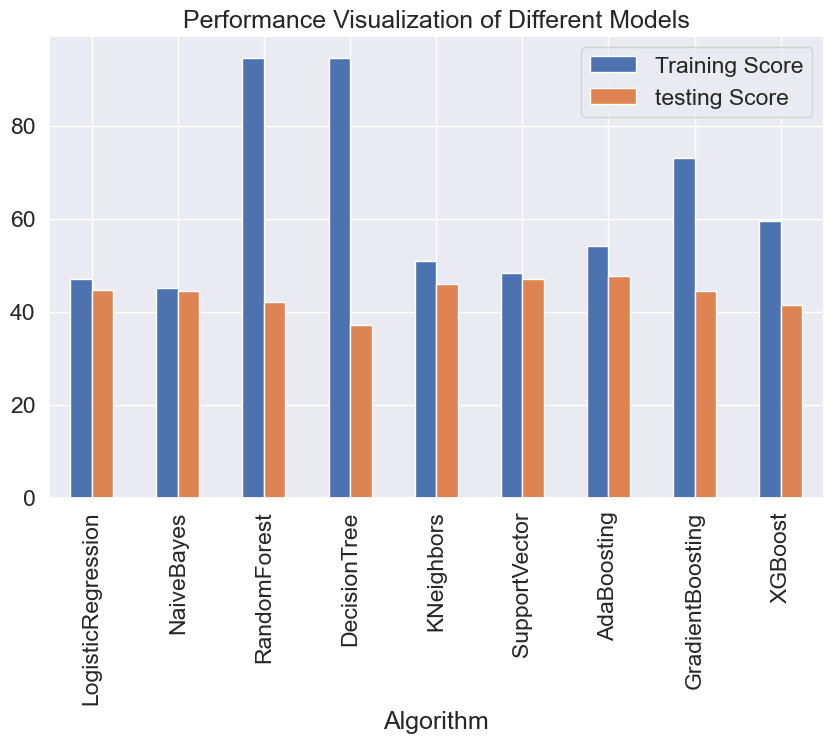

In [342]:
df.plot(x="Algorithm",y =["Training Score","testing Score"],figsize=(10,6),kind='bar',
        title="Performance Visualization of Different Models")